In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### a. (5 pt) Load the data into the DataFrame using the URL. 

In [515]:
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)
print(len(data))
print(data.dtypes)
print(data.head())

978628
DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  20032025

#### b. Initial Exploratory and visualization:

##### i. (5 pt) Print the metadata of column information.

In [518]:
print("The metadata of column information:\n")
print(data.info())

The metadata of column information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325

##### ii. (10 pts) What is the total number of crimes committed according to the description of the crime code? Make a visualization using just one graph that shows a distribution of several crimes.

Total number of crimes committed: 978628
Crm Cd Desc
VEHICLE - STOLEN                                           109906
BATTERY - SIMPLE ASSAULT                                    74665
BURGLARY FROM VEHICLE                                       61012
THEFT OF IDENTITY                                           60597
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59410
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64


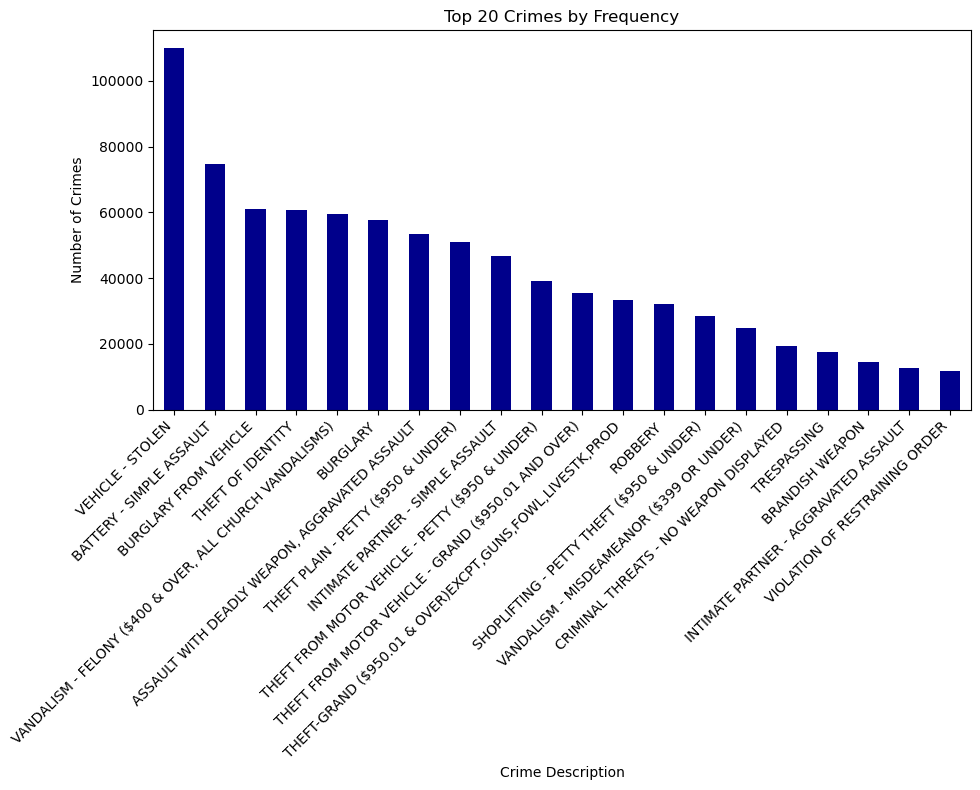

In [522]:
# The total number of crimes
total_crimes = crime_counts.sum()
print(f"Total number of crimes committed: {total_crimes}")

# Group by the crime description and count the occurrences
crime_counts = data['Crm Cd Desc'].value_counts()
print(crime_counts)

# Plot to show top 20 Crimes with their count
plt.figure(figsize=(10, 8))
crime_counts.head(20).plot(kind='bar', color='darkblue')
plt.title('Top 20 Crimes by Frequency')
plt.xlabel('Crime Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### iii. (10pts) Make a visualization to suggest highest crime prone areas. You may plot multiple graphs. 

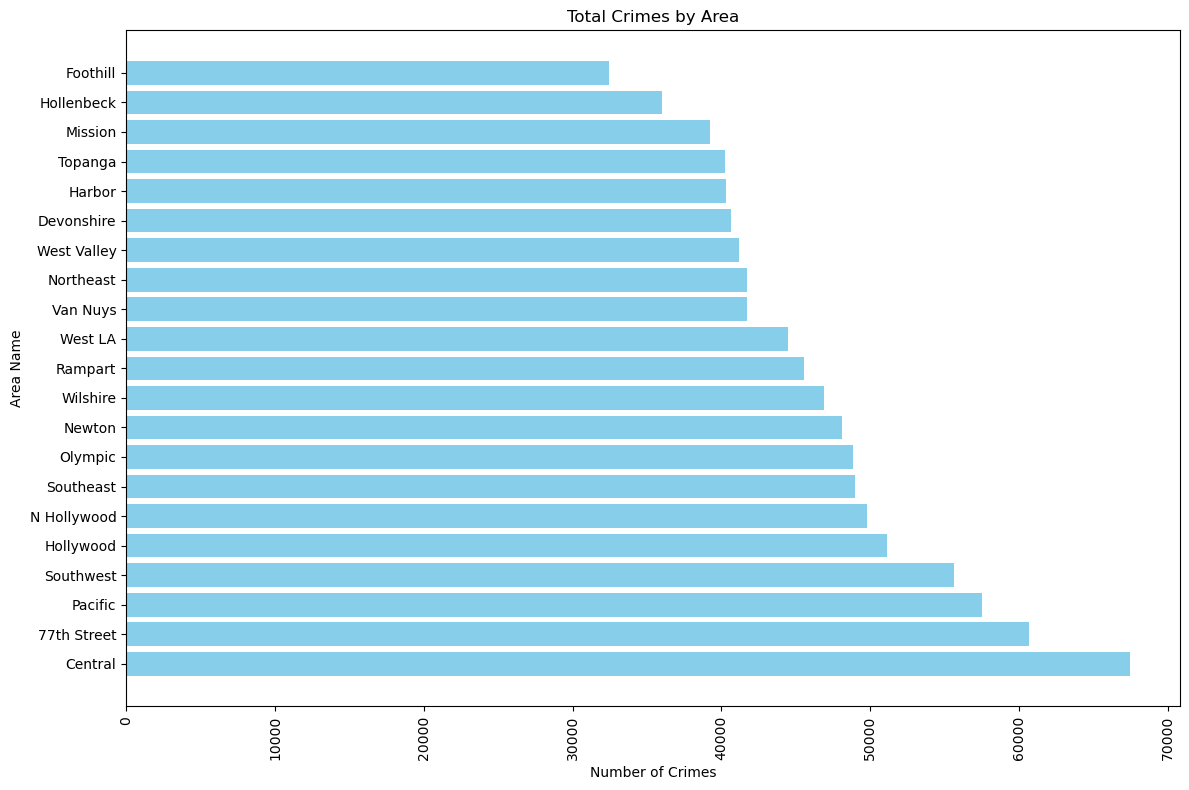

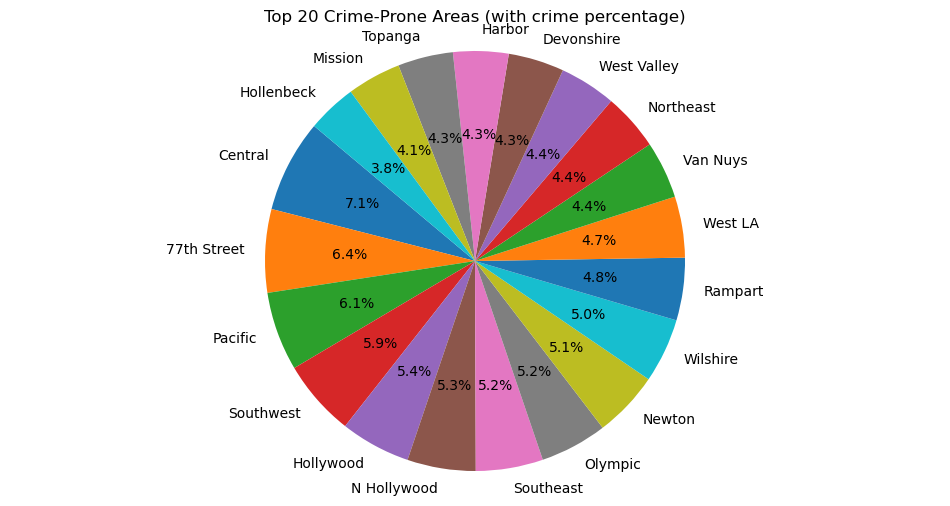

In [525]:
# Bar plot showing total crime per area
area_crime_count = data.groupby('AREA NAME').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(area_crime_count.index, area_crime_count.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Total Crimes by Area')
plt.ylabel('Area Name')
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Plot pie chart for the top 20 crime-prone areas
top_areas = area_crime_count.head(20)
plt.figure(figsize=(12, 6))
plt.pie(top_areas, labels=top_areas.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Crime-Prone Areas (with crime percentage)')
plt.axis('equal')
plt.show()


##### iv. (10 pts) Make a visualization to warn  general public about the trend crimes according to the time of crime occurence, sex and age of victim and the area in which it can occur. You may plot multiple graphs.

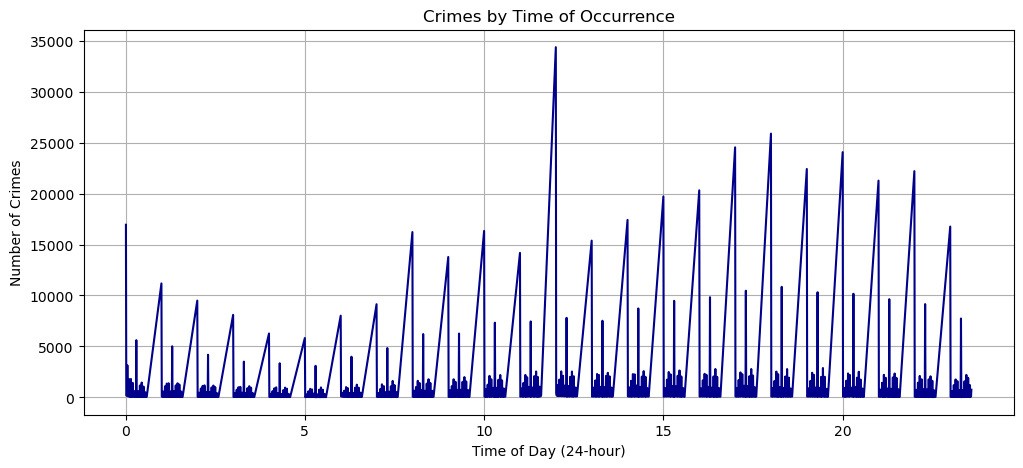

C:\Users\siria\AppData\Local\Temp\ipykernel_26108\3666526421.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_crime_count = data.groupby('Age Group').size()


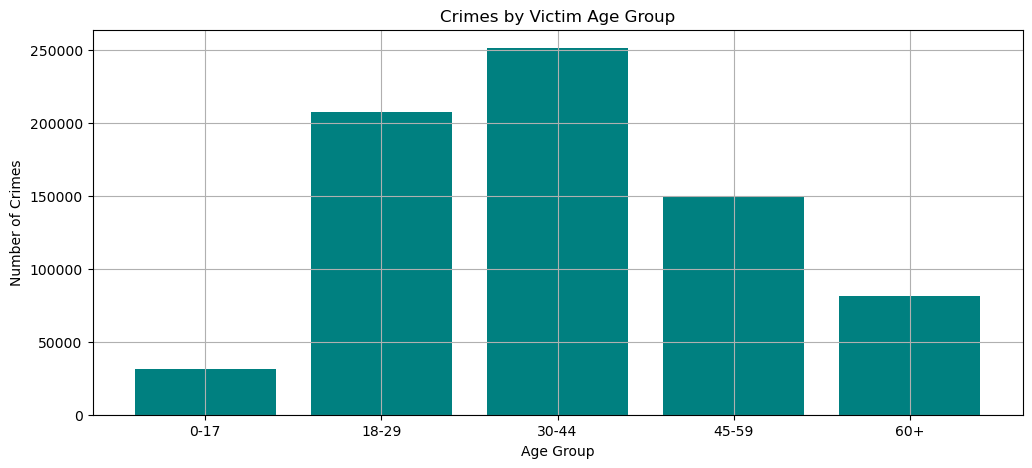

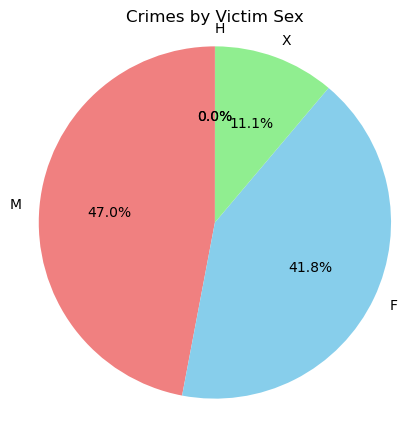

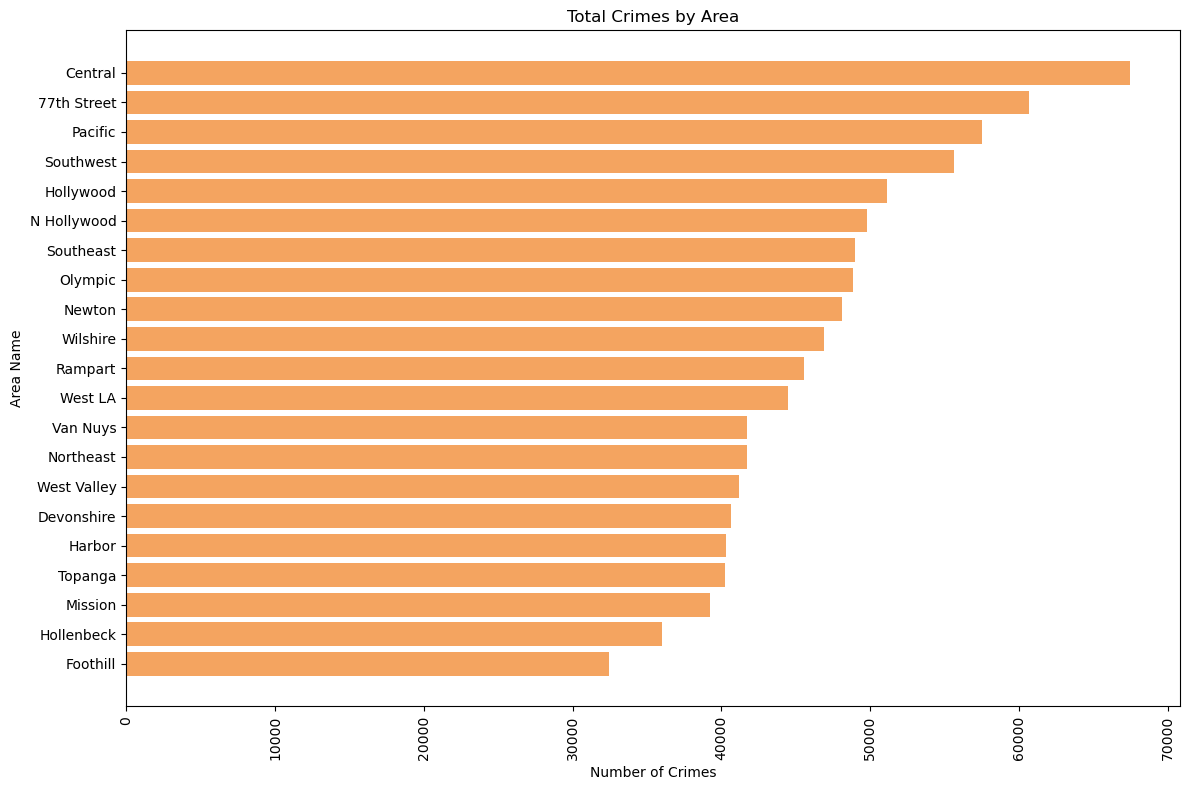

In [529]:
# 1. Crime Occurrence by Time of Day
plt.figure(figsize=(12, 5))
time = data['TIME OCC']*0.01
time_crime_count = data.groupby('TIME OCC').size()
plt.plot(time_crime_count.index*0.010, time_crime_count.values, color='darkblue')
plt.title('Crimes by Time of Occurrence')
plt.xlabel('Time of Day (24-hour)')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# 2. Crime Frequency by Victim’s Age Group
plt.figure(figsize=(12, 5))
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60+']
data['Age Group'] = pd.cut(data['Vict Age'], bins=age_bins, labels=age_labels)

age_crime_count = data.groupby('Age Group').size()
plt.bar(age_crime_count.index, age_crime_count.values, color='teal')
plt.title('Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# 3. Crime Distribution by Victim’s Sex
plt.figure(figsize=(5, 5))
sex_crime_count = data['Vict Sex'].value_counts()
plt.pie(sex_crime_count, labels=sex_crime_count.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue','lightgreen'])
plt.title('Crimes by Victim Sex')
plt.axis('equal')
plt.show()

# 4. Top 10 Crime prone areas
area_crime_count = data.groupby('AREA NAME').size().sort_values(ascending=True)
plt.figure(figsize=(12, 8))
plt.barh(area_crime_count.index, area_crime_count.values, color='sandybrown')
plt.xticks(rotation=90)
plt.title('Total Crimes by Area')
plt.ylabel('Area Name')
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()

#### c. Investigating Patterns of Vehicle Thefts in Los Angeles:

##### i. (10pt) Apply conditions to make it a valid problem statement. Also provide features which you think are important according to your problem statement.

**Problem Statement**: Identify patterns in vehicle theft occurrences to prevent future crimes. Analyze the patterns of vehicle thefts in Los Angeles to identify high-risk areas, times of occurence, and vehicle types. Considering all kinds of vehicle thefts like BIKE - STOLEN, VECHILE STOLEN - OTHERS (MOTORIZED SCOOTERS, BIKES, ETC). This analysis will inform targeted prevention efforts and resource allocation.

**Important Features**:
1. `TIME OCC`: Time of crime occurrence of vehicle theft.
2. `DATE OCC`: Date of vehicl theft occurrence.
3. `AREA NAME`: The geographic area where the crime took place(Patrol division).
4. `Crm Cd Desc`: Crime description to filter out vehicle theft.
5. `LAT`, `LON`: Location of the crime to identify hotspots.


##### ii. (10 pts) Explain your approach to your problem statement.

**Approach:**
1. **Data Filtering:** Filter the dataset to include only records related to vehicle thefts in Los Angeles. Ensure the dataset includes the specified important features.
2. **Data Cleaning:** Clean the data to ensure accuracy and consistency. Perform data cleaning steps to drop insignificant features, changing datatypes of features and dropping duplicate rows.
3. **Exploratory Data Analysis (EDA):** Perform EDA to identify patterns and trends in vehicle thefts based on time of occurence, Areas that are more prone to vehicle thefts and premises that are highly prone to vehicle thefts.
4. **Visualization:** Create visualizations to highlight key findings and trends.
5. **Hypothesis Testing:** Formulate and test hypotheses based on the observed patterns. Based on the patterns LPDA can take actions to reduce the vehicle theft count by focusing on particular time of occurence and areas.terns.

##### iii. (10 pts) Perform data cleaning to get the pure data for this problem. Explain your data cleaning steps. (At least 3 cleaning steps).

In [537]:
data.dtypes

DR_NO                int64
Date Rptd           object
DATE OCC            object
TIME OCC             int64
AREA                 int64
AREA NAME           object
Rpt Dist No          int64
Part 1-2             int64
Crm Cd               int64
Crm Cd Desc         object
Mocodes             object
Vict Age             int64
Vict Sex            object
Vict Descent        object
Premis Cd          float64
Premis Desc         object
Weapon Used Cd     float64
Weapon Desc         object
Status              object
Status Desc         object
Crm Cd 1           float64
Crm Cd 2           float64
Crm Cd 3           float64
Crm Cd 4           float64
LOCATION            object
Cross Street        object
LAT                float64
LON                float64
Age Group         category
dtype: object

In [542]:
# Turn date string into an actual date object
data["Date Rptd"] = pd.to_datetime(data["Date Rptd"])
data["DATE OCC"] = pd.to_datetime(data["DATE OCC"])
data.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
Age Group               category
dtype: object

In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           978628 non-null  int64         
 1   Date Rptd       978628 non-null  datetime64[ns]
 2   DATE OCC        978628 non-null  datetime64[ns]
 3   TIME OCC        978628 non-null  int64         
 4   AREA            978628 non-null  int64         
 5   AREA NAME       978628 non-null  object        
 6   Rpt Dist No     978628 non-null  int64         
 7   Part 1-2        978628 non-null  int64         
 8   Crm Cd          978628 non-null  int64         
 9   Crm Cd Desc     978628 non-null  object        
 10  Mocodes         834648 non-null  object        
 11  Vict Age        978628 non-null  int64         
 12  Vict Sex        841430 non-null  object        
 13  Vict Descent    841419 non-null  object        
 14  Premis Cd       978613 non-null  flo

In [547]:
# Filter for vehicle theft crimes
theft_count = data['Crm Cd Desc'].value_counts()
#print(theft_count.head(50))
vehicle_theft_data = data[data['Crm Cd Desc'].str.contains('VEHICLE - STOLEN|BIKE - STOLEN|VEHICLE, STOLEN - OTHER', case=False, na=False)]

# Data cleaning steps:
# 1. Remove rows with missing 'TIME OCC', 'AREA NAME', 'LAT', or 'LON' fields
vehicle_theft_data_cleaned = vehicle_theft_data.dropna(subset=['TIME OCC', 'AREA NAME', 'LAT', 'LON'])

# 2. Drop duplicate rows if any
vehicle_theft_data_cleaned = vehicle_theft_data_cleaned.drop_duplicates()

# 3. Filter out invalid times (e.g., negative numbers or times outside the 24-hour range)
vehicle_theft_data_cleaned = vehicle_theft_data_cleaned[(vehicle_theft_data_cleaned['TIME OCC'] <= 2400) & (vehicle_theft_data_cleaned['TIME OCC'] >= 0)]

# 4. Check the number of NaN values in 'Crm Cd 2', 'Crm Cd 3' and 'Crm Cd 4'
nan_crm_cd_2 = vehicle_theft_data_cleaned['Crm Cd 2'].isna().sum()
nan_crm_cd_3 = vehicle_theft_data_cleaned['Crm Cd 3'].isna().sum()
nan_crm_cd_4 = vehicle_theft_data_cleaned['Crm Cd 4'].isna().sum()

# Print the number of NaN values
print(f"Number of NaN values in 'Crm Cd 2': {nan_crm_cd_2}")
print(f"Number of NaN values in 'Crm Cd 3': {nan_crm_cd_3}")
print(f"Number of NaN values in 'Crm Cd 4': {nan_crm_cd_4}")

# Drop 'Crm Cd 2', 'Crm Cd 3' and 'Crm Cd 4' columns from the dataframe
vehicle_theft_data_cleaned = vehicle_theft_data_cleaned.drop(columns=['Crm Cd 2','Crm Cd 3', 'Crm Cd 4'])


# 5. Convert the ‘TIME OCC’ column to a proper time format
vehicle_theft_data_cleaned['TIME OCC'] = vehicle_theft_data_cleaned['TIME OCC'].apply(lambda x: f"{int(x):04d}")
vehicle_theft_data_cleaned['TIME OCC'] = pd.to_datetime(vehicle_theft_data_cleaned['TIME OCC'], format='%H%M').dt.time

# Display the first few rows after data cleaning
vehicle_theft_data_cleaned.head()

Number of NaN values in 'Crm Cd 2': 119995
Number of NaN values in 'Crm Cd 3': 120381
Number of NaN values in 'Crm Cd 4': 120389


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Age Group
0,190326475,2020-03-01,2020-03-01,21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,NaN
2,200320258,2020-11-11,2020-11-04,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,NaN,34.0210,-118.3002,18-29
13,221008844,2022-05-06,2020-11-01,01:30:00,10,West Valley,1029,1,510,VEHICLE - STOLEN,...,NaN,NaN,IC,Invest Cont,510.0,VALJEAN ST,VANOWEN AV,34.1939,-118.4859,NaN
23,200412582,2020-09-09,2020-09-09,06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,NaN,IC,Invest Cont,510.0,200 E AVENUE 28,NaN,34.0820,-118.2130,NaN
27,200209713,2020-05-03,2020-05-02,18:00:00,2,Rampart,245,1,510,VEHICLE - STOLEN,...,NaN,NaN,IC,Invest Cont,510.0,2500 W 4TH ST,NaN,34.0642,-118.2771,NaN


**Data Cleaning Steps:**

1. Filter for Vehicle Theft Crimes: Ffiltered the dataset to include only rows where the ‘Crm Cd Desc’ column contains theCrime related to Vehicle theft like VEHICLE - STOLEN, BIKE - STOLEN and VEHICLE, STOLEN - OTHER.
2. Remove Rows with Missing Values: Removed rows that have missing values in the ‘TIME OCC’, ‘AREA NAME’, ‘LAT’, or ‘LON’ columns. This ensures that analysis is based on complete data.
3. Drop Duplicate Rows: Eliminated any duplicate rows from the dataset to avoid redundancy and ensure the accuracy of analysis.
4. Filter Out Invalid Times: Filtered out rows where the ‘TIME OCC’ column contains values outside the valid range (0 to 2400). This step ensures that the time data is within a realistic 24-hour format.
5. Check and Drop Columns with Many NaN Values: Checked the number of NaN values in the ‘Crm Cd 2’, ‘Crm Cd 3’, and ‘Crm Cd 4’ columns. Since these columns had a significant number of missing values, so decided to drop them from the dataset.
6. Convert ‘TIME OCC’ to Proper Time Format: Converted the ‘TIME OCC’ column to a proper time format. First, ensured that the time values are in a four-digit format (e.g., 0930 for 9:30 AM). Then, converted these values to a time object using pd.to_datetime.
e. Values:

##### iv. (10 pts) Implement your approach to this problem and justify your hypothesis.

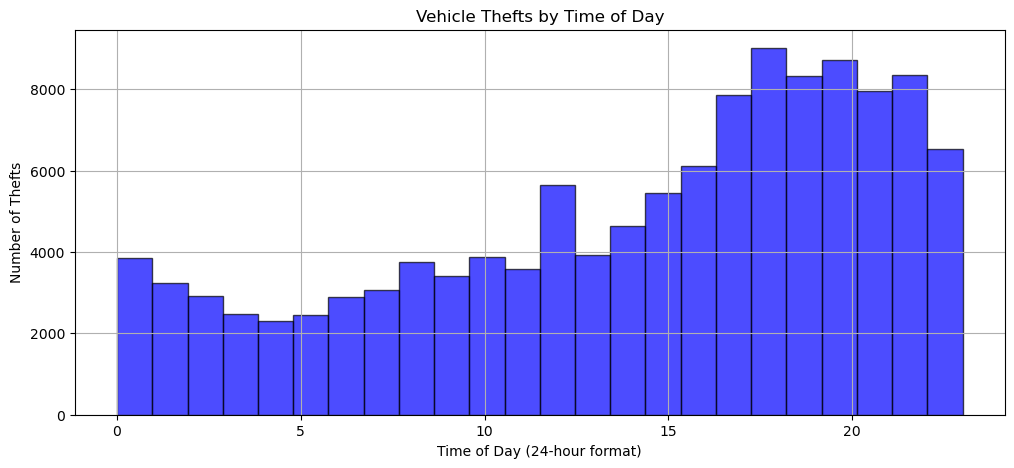

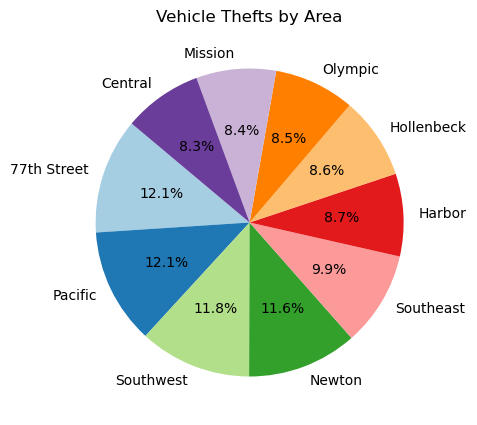

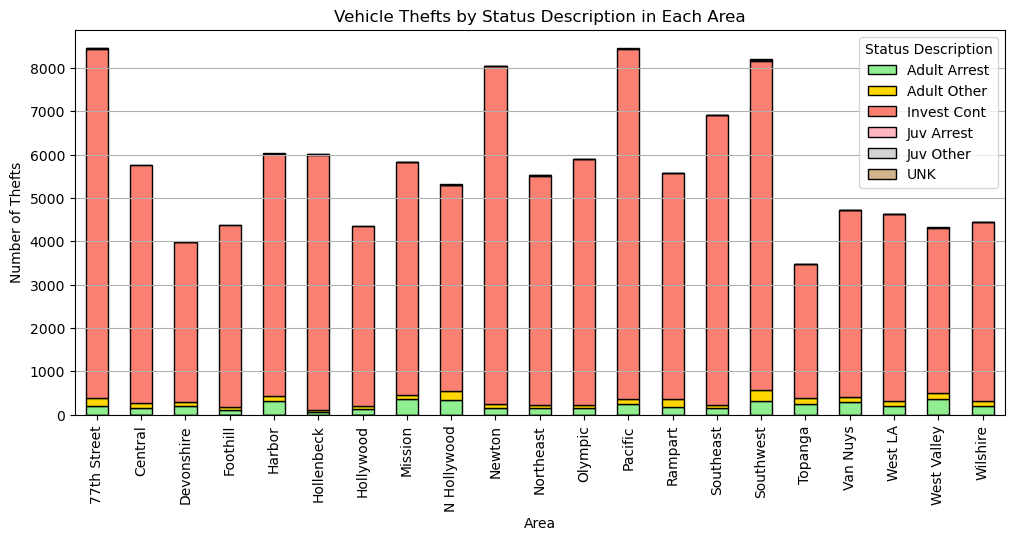

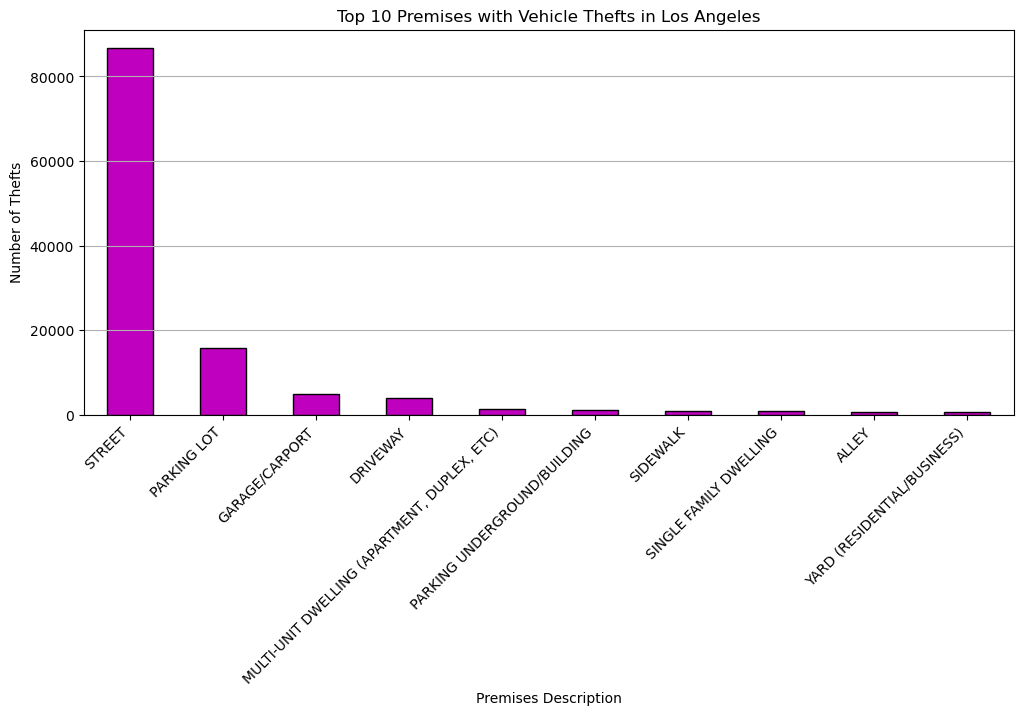

In [551]:
# Plotting Vehicle Thefts by Time of Day
plt.figure(figsize=(12, 5))
plt.hist(vehicle_theft_data_cleaned['TIME OCC'].dropna().apply(lambda x: x.hour), bins=24, color='blue', edgecolor='black', alpha=0.7)
plt.title('Vehicle Thefts by Time of Day')
plt.xlabel('Time of Day (24-hour format)')
plt.ylabel('Number of Thefts')
plt.grid(True)
plt.show()

# Plotting Top 10 Vehicle Thefts by Area
area_counts = vehicle_theft_data_cleaned['AREA NAME'].value_counts().head(10)
plt.figure(figsize=(12, 5))
plt.pie(area_counts.values, labels=area_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Vehicle Thefts by Area')
plt.show()

# Plotting Vehicle Thefts by Status Description in Each Area
status_area_counts = vehicle_theft_data_cleaned.groupby(['AREA NAME', 'Status Desc']).size().unstack(fill_value=0)
status_area_counts.plot(kind='bar', stacked=True, figsize=(12, 5), color=['lightgreen','gold', 'salmon','lightpink','lightgrey','tan'], edgecolor='black')
plt.title('Vehicle Thefts by Status Description in Each Area')
plt.xlabel('Area')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Status Description')
plt.show()

# Plot the top 10 premises with the highest number of vehicle thefts
plt.figure(figsize=(12, 5))
top_premises = vehicle_theft_data_cleaned['Premis Desc'].value_counts().head(10)
top_premises.plot(kind='bar', color='m', edgecolor='black')
plt.title('Top 10 Premises with Vehicle Thefts in Los Angeles')
plt.xlabel('Premises Description')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()



**Hypothesis Justification:**

**Time of Day:** Vehicle thefts are hypothesized to occur more frequently during late night hours between 18:00 to 22:00. This may be due to evening hours often coincide with increased outdoor activities, such as shopping, dining, and entertainment. This increased human presence could create opportunities for theft.The frequency of thefts decreases significantly before and after this peak, suggesting a strong correlation between time and the likelihood of theft.

**Area:** As per the pie chart, it can be concluded that vehicle thefts are not evenly distributed across the city. Certain areas, such as 77th Street and Pacific, experience significantly higher theft rates compared to others. 

**Status Description in each area:** Based on the analysis of the stacked chart, it can be concluded that vehicle theft rates vary significantly across different areas in the city. The types of outcomes associated with these thefts also differ, with areas experiencing a higher proportion of unsolved cases.

**Premises Description:** Vehicle thefts are not evenly distributed across different premises types in Los Angeles. Certain locations, such as streets and parking lots, experience significantly higher theft rates compared to others. Further investigation into factors like location, security measures, and accessibility can provide a deeper understanding of the underlying causes.

#### d. Exploring cases in Identity Theft Cases in Los Angeles:

##### i. (10 pts) Explain your approach to this problem. Also provide features which you think are important according to your problem statement

**Problem Statement:** Analyze the patterns of identity thefts in Los Angeles to identify the most common times, locations, and victim demographics associated with these crimes. This analysis aims to provide insights that can help in developing targeted prevention strategies.

**Approach:**

**Data Filtering:** Filter the dataset to include only records related to identity thefts along with specified features.

**Data Cleaning:** Clean the data to ensure accuracy and consistency. Perform data cleaning steps like removing outliers, removing invalid victim ages and perform imputation wherever required (for this there are some outliers for LON and LAT So, removed them based on interquartile range).

**Exploratory Data Analysis (EDA):** Perform EDA to identify patterns and trends in identity thefts based on the type of the victims they target based on Sex, descent and age of the victim. Additionally, consider the locations which are more prone to identity thefts.

**Visualization:** Create visualizations to highlight key findings and trends.

**Hypothesis Testing:** Formulate and test hypotheses based on the observed patterns. Based on the exploratory analysis, LPDA can warn people based on the features of target victims and increase survelliance in more theft prone areas.


**Important Features:**

`TIME OCC`: Time of occurrence of the crime.

`AREA NAME`: The area where the crime occurred.

`Vict Age`: Age of the victim.

`Vict Sex`: Sex of the victim.

`Vict Descent`: Descent code of the victim

`Crm Cd Desc`: Description of the crime (to filter identity thefts).

`DATE OCC`: Date of occurrence of the crime.

##### ii. (10 pts) Perform data cleaning to get the pure data for this problem. Explain your data cleaning steps.

Number of invalid Vict Age: 1164
Number of invalid Vict Age: 0


C:\Users\siria\AppData\Local\Temp\ipykernel_26108\2230002856.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1200' '2300' '0900' ... '1200' '0940' '1415']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  identity_theft_data_cleaned.loc[:, 'TIME OCC'] = identity_theft_data_cleaned['TIME OCC'].apply(lambda x: f"{int(x):04d}")


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Age Group
4,220614831,2022-08-18,2020-08-17,12:00:00,6,HOLLYWOOD,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,18-29
5,231808869,2023-04-04,2020-12-01,23:00:00,18,SOUTHEAST,1826,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,30-44
6,230110144,2023-04-04,2020-07-03,09:00:00,1,CENTRAL,182,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620,18-29
7,220314085,2022-07-22,2020-05-12,11:10:00,3,SOUTHWEST,303,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537,18-29
8,231309864,2023-04-28,2020-12-09,14:00:00,13,NEWTON,1375,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521,18-29


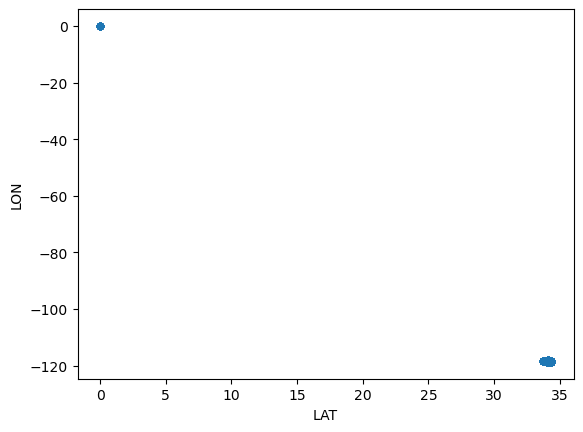

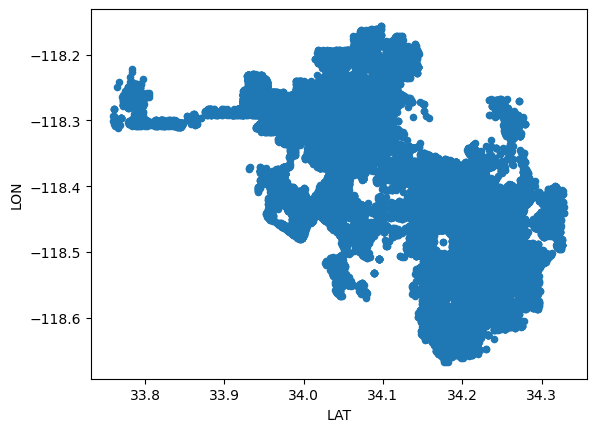

In [558]:
# Filter data for vehicle theft
identity_theft_data_cleaned = data[data["Crm Cd Desc"] == "THEFT OF IDENTITY"]

# Data cleaning steps:

# 1. Check number of invalid Vict Age
print("Number of invalid Vict Age:", len(identity_theft_data_cleaned[identity_theft_data_cleaned['Vict Age'] <= 0]))

# Calculate the mean of valid Vict Age values (greater than 0)
mean_vict_age = identity_theft_data_cleaned[identity_theft_data_cleaned['Vict Age'] > 0]['Vict Age'].mean()

# Impute invalid Vict Age values (<= 0) with the mean age
identity_theft_data_cleaned.loc[identity_theft_data_cleaned['Vict Age'] <= 0, 'Vict Age'] = int(mean_vict_age)

# Check number of invalid Vict Age after imputation (should be 0)
print("Number of invalid Vict Age:", len(identity_theft_data_cleaned[identity_theft_data_cleaned['Vict Age'] <= 0]))

# 2. Convert the ‘TIME OCC’ column to a proper time format for accurate analysis.
identity_theft_data_cleaned.loc[:, 'TIME OCC'] = identity_theft_data_cleaned['TIME OCC'].apply(lambda x: f"{int(x):04d}")
identity_theft_data_cleaned.loc[:, 'TIME OCC'] = pd.to_datetime(identity_theft_data_cleaned['TIME OCC'], format='%H%M').dt.time

# 3. Convert 'AREA NAME' to uppercase
identity_theft_data_cleaned.loc[:, 'AREA NAME'] = identity_theft_data_cleaned['AREA NAME'].str.upper()

# 4. Remove any duplicate records
identity_theft_data_cleaned = identity_theft_data_cleaned.drop_duplicates()

# 5. Removing invalid LAT and LON (outliers)
identity_theft_data_cleaned.plot.scatter(x="LAT", y="LON")
Q1 = identity_theft_data_cleaned[['LAT', 'LON']].quantile(0.25)
Q3 = identity_theft_data_cleaned[['LAT', 'LON']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
identity_theft_data_cleaned = identity_theft_data_cleaned[~((identity_theft_data_cleaned[['LAT', 'LON']] < lower_bound) | (identity_theft_data_cleaned[['LAT', 'LON']] > upper_bound)).any(axis=1)]
identity_theft_data_cleaned.plot.scatter(x="LAT", y="LON")

# Display the first few rows after data cleaning
identity_theft_data_cleaned.head()

**Data Cleaning Steps:**

1. Filter Data for Identity Theft: Filtered the dataset to include only records where the crime description (Crm Cd Desc) is “THEFT OF IDENTITY”.

2. Check and Impute Invalid Victim Age: Checked for invalid victim ages (Vict Age) that are less than or equal to 0. Calculated the mean age of valid victim ages (greater than 0). Imputed the invalid ages with the calculated mean age.

3. Convert TIME OCC to Proper Time Format: Converted the TIME OCC column to a proper time format (HHMM), ensuring it is four digits. Converted this formatted string to a time object for accurate analysis.

4. Standardize AREA NAME: Converted the AREA NAME column to uppercase to ensure consistency.

5. Remove Duplicate Records: 
Removed any duplicate records from the dataset to avoid redundancy

6. Remove Outliers in Latitude and Longitude: Plotted a scatter plot of LAT and LON to visualize the data. Calculated the interquartile range (IQR) for LAT and LON. Defined lower and upper bounds to identify outliers. Removed records with LAT and LON values outside these bounds. Plotted another scatter plot to confirm the removal of outliers.tliers.